# Construção de um modelo de Regressão de Árvore de Decisão

- Objetivo: Criar através do dataset de diabetes do `sklearn` um modelo de árvore de regressão para prever o nível de glicose no sangue de pacientes com base em características fisiológicas.

## Imports e Libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
# Importando o dataset de diabetes
diabetes = load_diabetes()

In [4]:
# Conversão para DataFrame e divisão dos dados
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

In [5]:
print(X.shape, y.shape)

(442, 10) (442,)


In [6]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

## Modelagem

### Verificando Dados Nulos ou Duplicados

In [10]:
# Verificando existência de dados faltantes
X.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [11]:
# Verificando a existência de dados duplicados
X.duplicated().sum()

0

Infere-se, portanto, que a base de dados já se encontra **tratada**, uma vez que não possui dados faltantes, nem duplicados e pela visualização inicial os dados já se encontram normalizados.

### Divisão dos Dados

In [12]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modelagem Sem Poda

In [13]:
full_tree = DecisionTreeRegressor(random_state=42)
full_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Modelagem com Poda

In [14]:
tree_depth3 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_depth3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [15]:
tree_depth5 = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_depth5.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

## Previsões e Métricas

In [16]:
# Modalgem com profundidade livre
y_pred_full = full_tree.predict(X_test)
r2_full = r2_score(y_test, y_pred_full)
mse_full = mean_squared_error(y_test, y_pred_full)
mae_full = mean_absolute_error(y_test, y_pred_full)
print(f'R² Score (sem poda): {r2_full:.4f}')
print(f'MSE (sem poda): {mse_full:.4f}')
print(f'MAE (sem poda): {mae_full:.4f}')

R² Score (sem poda): -0.0555
MSE (sem poda): 5697.7895
MAE (sem poda): 60.0150


In [18]:
# Modelagem com profundidade = 3.
y_pred_depth3 = tree_depth3.predict(X_test)
r2_depth3 = r2_score(y_test, y_pred_depth3)
mse_depth3 = mean_squared_error(y_test, y_pred_depth3)
mae_depth3 = mean_absolute_error(y_test, y_pred_depth3)
print(f'R² Score (max_depth=3): {r2_depth3:.4f}')
print(f'MSE (max_depth=3): {mse_depth3:.4f}')
print(f'MAE (max_depth=3): {mae_depth3:.4f}')

R² Score (max_depth=3): 0.3300
MSE (max_depth=3): 3616.7699
MAE (max_depth=3): 46.9576


In [19]:
y_pred_depth5 = tree_depth5.predict(X_test)
r2_depth5 = r2_score(y_test, y_pred_depth5)
mse_depth5 = mean_squared_error(y_test, y_pred_depth5)
mae_depth5 = mean_absolute_error(y_test, y_pred_depth5)
print(f'R² Score (max_depth=5): {r2_depth5:.4f}')
print(f'MSE (max_depth=5): {mse_depth5:.4f}')
print(f'MAE (max_depth=5): {mae_depth5:.4f}')

R² Score (max_depth=5): 0.2927
MSE (max_depth=5): 3818.0715
MAE (max_depth=5): 48.5693


In [27]:
# Verificando no treino para comprovar o overfitting
r2_train = r2_score(y_train, full_tree.predict(X_train))
r2_train_3 = r2_score(y_train, tree_depth3.predict(X_train))
print(f'R² Treino: {r2_train:.4f}')
print(f'R² Treino (max_depth=3): {r2_train_3:.4f}')

R² Treino: 1.0000
R² Treino (max_depth=3): 0.5253


## Visualização das Árvores e Importância das Features

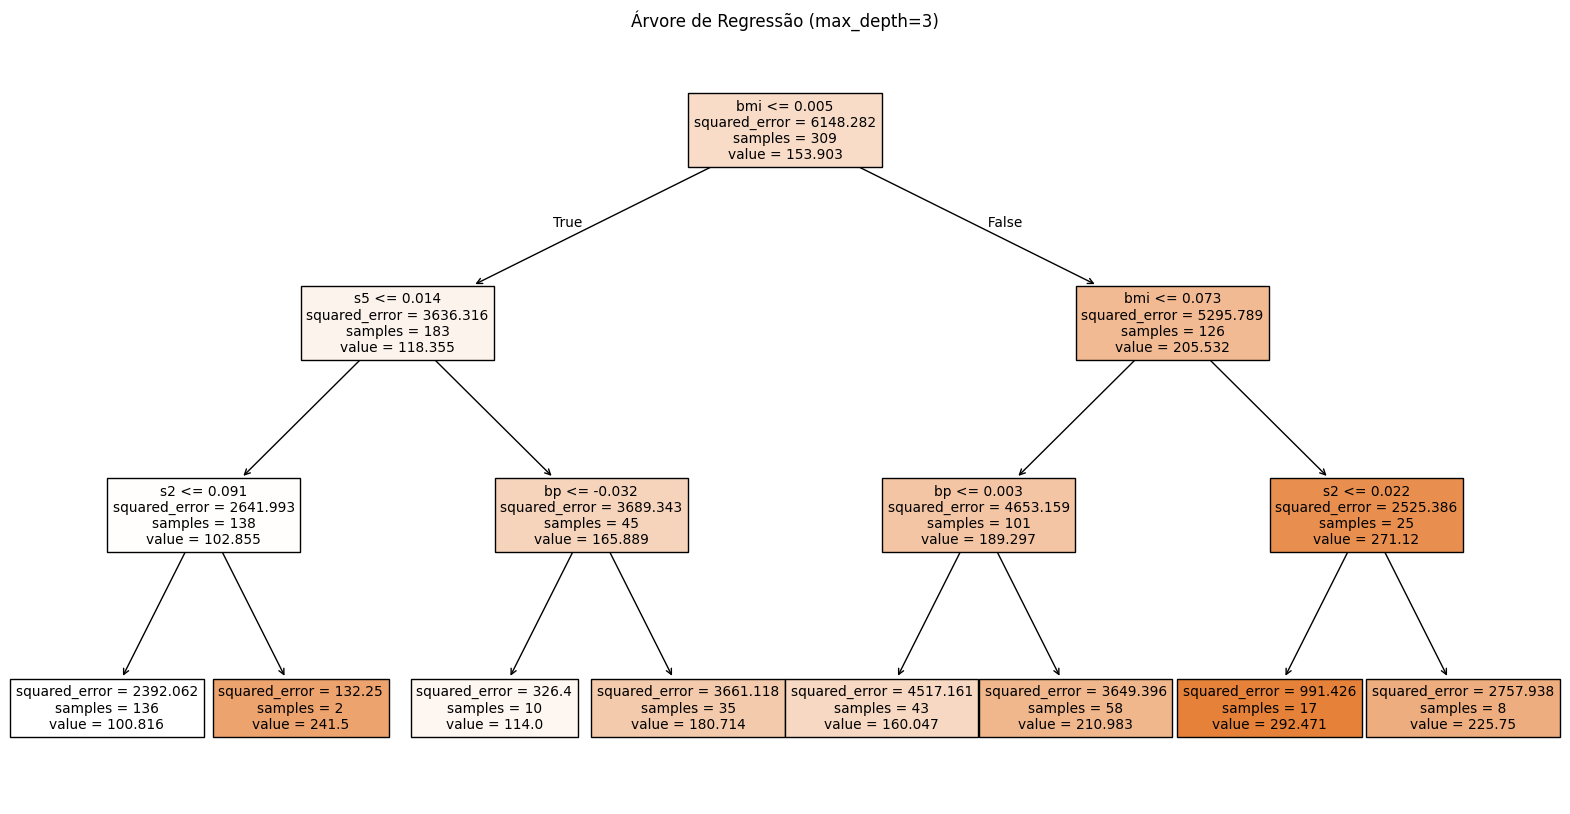

In [20]:
plt.figure(figsize=(20, 10))
plot_tree(tree_depth3, feature_names=X.columns, filled=True)
plt.title('Árvore de Regressão (max_depth=3)')
plt.show()

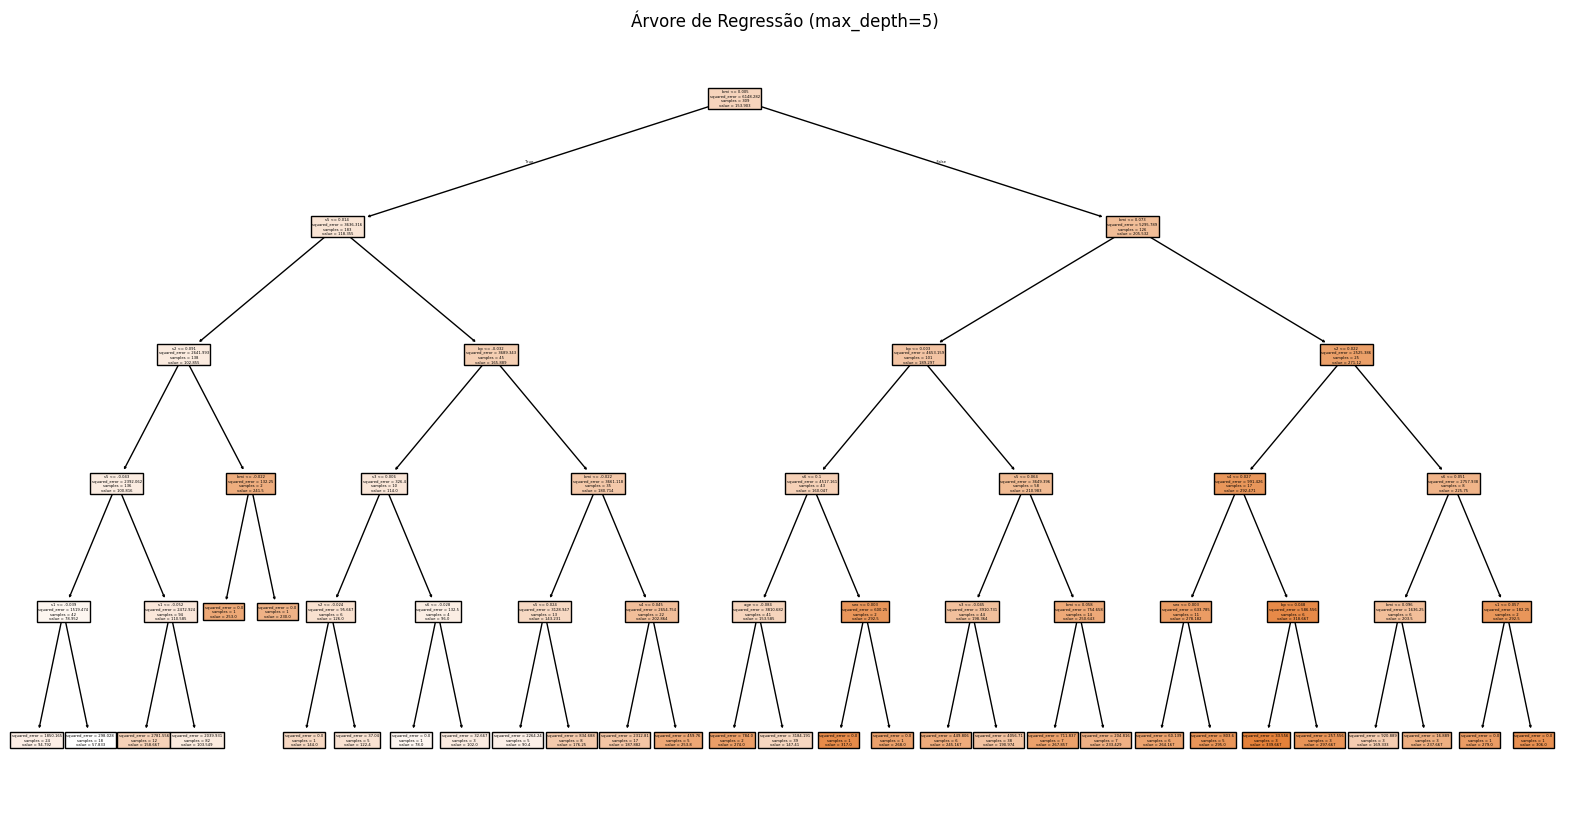

In [21]:
plt.figure(figsize=(20, 10))
plot_tree(tree_depth5, feature_names=X.columns, filled=True)
plt.title('Árvore de Regressão (max_depth=5)')
plt.show()

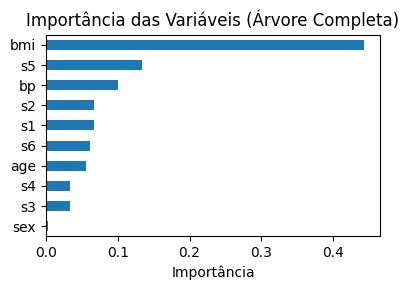

In [23]:
importances = pd.Series(full_tree.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(4, 3))
plt.title('Importância das Variáveis (Árvore Completa)')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()

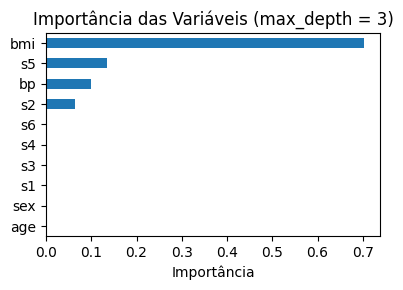

In [24]:
importances = pd.Series(tree_depth3.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(4, 3))
plt.title('Importância das Variáveis (max_depth = 3)')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()

## Respondendo as Perguntas

> 1. Qual variável foi a mais importante no modelo?

Segundo os gráficos `plot_tree` e os de feature importance a variável mais importante para o modelo é a de `bmi`, índice de massa corporal.

> 2. O modelo completo apresentou overfitting? Justifique.

Sim.
O modelo completo, com profundidade livre, apresentou um R² de 1.0000 no treino, ou seja, ele memoriza perfeitamente os dados de treino, o que é um forte indicativo de overfitting, o que foi corroborado com o R² com os dados de teste sendo de -0.0555.

> 3. A poda teve impacto positivo ou negativo no desempenho? Por quê?

A pode teve impacto positivo no desempenho do modelo, uma vez que com a profundidade livre o R² foi negativo e com a profundidade igual a três (3) o R² subiu para 0.33.